## Where is the probe?

In [24]:
import matplotlib.pyplot as plt
from pathlib import Path


import spikeinterface.full as si
import spikeinterface.extractors as se
import spikeinterface.widgets as sw

import numpy as np
import  multitaper
from tqdm import tqdm
import pandas as pd

INPUT = '/ceph/sjones/projects/FlexiVexi/raw_data/FNT103/2024-08-29T15-17-32/Open-Ephys/FNT103_2024-09-03_15-17-05/Record Node 103'

## Have a look at local data

In [25]:
recording = se.read_openephys(INPUT, stream_id  = '1')
seg1 = recording.select_segments(0)

FileNotFoundError: [Errno 2] No such file or directory: '/ceph/sjones/projects/FlexiVexi/raw_data/FNT103/2024-08-29T15-17-32/Open-Ephys/FNT103_2024-09-03_15-17-05/Record Node 103'

In [21]:
seg1

SelectSegmentRecording: 384 channels - 30.0kHz - 1 segments - 43,892,741 samples 
                        1,463.09s (24.38 minutes) - int16 dtype - 31.39 GiB

rec1 = si.highpass_filter(recording, freq_min=400.)
bad_channel_ids, channel_labels = si.detect_bad_channels(rec1)
rec2 = rec1.remove_channels(bad_channel_ids)
print('bad_channel_ids', bad_channel_ids)

rec3 = si.phase_shift(rec2)
rec4 = si.common_reference(rec3, operator="median", reference="global")
rec = rec4
rec

In [3]:
split_recording_dict = recording.split_by("group")


In [4]:
probe1 = split_recording_dict[1]

w_ts = sw.plot_traces(probe1, mode="map", time_range=(5, 15), show_channel_ids=True, order_channel_by_depth=True, seconds_per_row=60, clim  = (-50, 50))


Keep 10s of data

In [5]:
samp = probe1.sampling_frequency
traces =  (probe1.get_traces(start_frame=5*samp, end_frame=15*samp)).T

In [6]:
traces.shape

(96, 300000)

Data has %d channels and %d samples (96, 300000)


Text(0, 0.5, 'LFP (mV)')

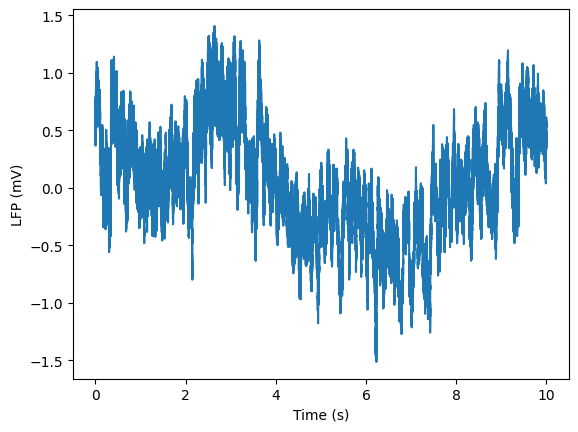

In [7]:
nChans, nSamps = traces.shape
print('Data has %d channels and %d samples',(nChans,nSamps))
plt.plot(np.arange(nSamps)/samp,traces[0,:]/1000)
plt.xlabel('Time (s)')
plt.ylabel('LFP (mV)')

They want to have a look at power in Dbs in the delta band (0-4 Hz). We use multitaper because the window is so short.  

DPSS using interpolation 300000 100000


Text(0, 0.5, 'power (V**2)')

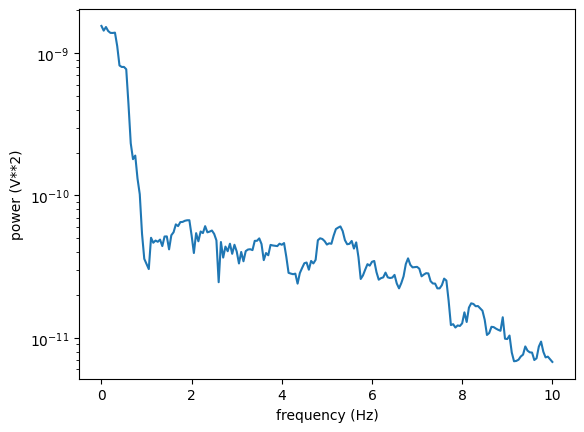

In [8]:
psd = multitaper.MTSpec(x=traces[0,:]/10E6, dt=1.0/samp, nw=5) # run the multitaper spectrum
pxx, f = psd.spec, psd.freq # unpack power spectrum and frequency from output
plot_range = (f<=10) & (f>=0) # find the frequencies we want to plot
plt.semilogy(f[plot_range],pxx[plot_range])
plt.xlabel('frequency (Hz)')
plt.ylabel('power (V**2)')

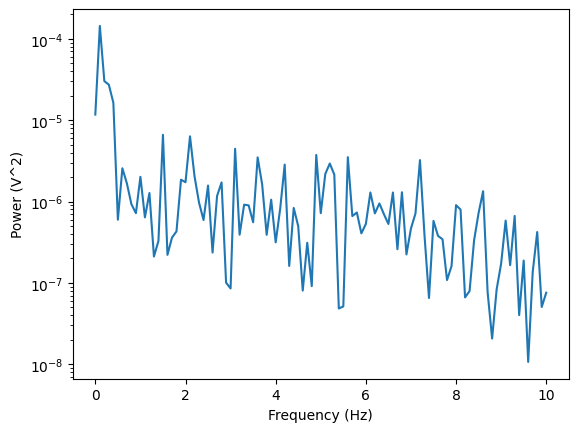

In [9]:
# Define your trace and sampling rate
trace = traces[0, :] / 10E6  # Example trace, adjust scaling as needed
n = len(trace)
dt = 1.0 / samp  # Sampling interval

# Run FFT
fft_values = np.fft.rfft(trace)
frequencies = np.fft.rfftfreq(n, dt)

# Calculate the power spectral density (PSD)
psd = np.abs(fft_values) ** 2 / n

# Define the frequency range (0 to 10 Hz)
plot_range = (frequencies <= 10) & (frequencies >= 0)

# Plot the power spectral density
plt.semilogy(frequencies[plot_range], psd[plot_range])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2)')
plt.show()

In [31]:
# Define the frequency range of interest (0-4 Hz)
band_range = (f >= 0) & (f <= 4)

# Calculate the total power in the 0-4 Hz band by summing the power values in that range
power_band = np.sum(pxx[band_range])

# Convert the power to dB
power_db = 10 * np.log10(power_band)

power_db

-77.28993918373487

Let's do it for all 96

In [39]:
pxx_list = list(np.zeros(96))
f_list = list(np.zeros(96))

for i in tqdm(np.arange(len(pxx_list))):
    print (i)
    psd = multitaper.MTSpec(x=traces[i,:]/10E6, dt=1.0/samp, nw=5) # run the multitaper spectrum
    pxx, f = psd.spec, psd.freq # unpack power spectrum and frequency from output
    pxx_list[i] = pxx
    f_list[i] = f

  0%|          | 0/96 [00:00<?, ?it/s]

0
DPSS using interpolation 300000 100000


  1%|          | 1/96 [00:12<19:01, 12.01s/it]

1
DPSS using interpolation 300000 100000


  2%|▏         | 2/96 [00:23<18:19, 11.70s/it]

2
DPSS using interpolation 300000 100000


  3%|▎         | 3/96 [00:34<17:40, 11.41s/it]

3
DPSS using interpolation 300000 100000


  4%|▍         | 4/96 [00:45<17:30, 11.42s/it]

4
DPSS using interpolation 300000 100000


  5%|▌         | 5/96 [00:58<17:50, 11.76s/it]

5
DPSS using interpolation 300000 100000


  6%|▋         | 6/96 [01:09<17:12, 11.47s/it]

6
DPSS using interpolation 300000 100000


  7%|▋         | 7/96 [01:20<16:57, 11.43s/it]

7
DPSS using interpolation 300000 100000


  8%|▊         | 8/96 [01:31<16:30, 11.26s/it]

8
DPSS using interpolation 300000 100000


  9%|▉         | 9/96 [01:42<16:18, 11.25s/it]

9
DPSS using interpolation 300000 100000


 10%|█         | 10/96 [01:54<16:19, 11.40s/it]

10
DPSS using interpolation 300000 100000


 11%|█▏        | 11/96 [02:05<15:57, 11.27s/it]

11
DPSS using interpolation 300000 100000


 12%|█▎        | 12/96 [02:17<16:06, 11.51s/it]

12
DPSS using interpolation 300000 100000


 14%|█▎        | 13/96 [02:29<15:55, 11.51s/it]

13
DPSS using interpolation 300000 100000


 15%|█▍        | 14/96 [02:40<15:39, 11.46s/it]

14
DPSS using interpolation 300000 100000


 16%|█▌        | 15/96 [02:51<15:26, 11.44s/it]

15
DPSS using interpolation 300000 100000


 17%|█▋        | 16/96 [03:03<15:13, 11.42s/it]

16
DPSS using interpolation 300000 100000


 18%|█▊        | 17/96 [03:15<15:34, 11.82s/it]

17
DPSS using interpolation 300000 100000


 19%|█▉        | 18/96 [03:27<15:25, 11.87s/it]

18
DPSS using interpolation 300000 100000


 20%|█▉        | 19/96 [03:39<15:15, 11.89s/it]

19
DPSS using interpolation 300000 100000


 21%|██        | 20/96 [03:49<14:22, 11.35s/it]

20
DPSS using interpolation 300000 100000


 22%|██▏       | 21/96 [04:01<14:09, 11.32s/it]

21
DPSS using interpolation 300000 100000


 23%|██▎       | 22/96 [04:17<15:39, 12.69s/it]

22
DPSS using interpolation 300000 100000


 24%|██▍       | 23/96 [04:28<14:57, 12.29s/it]

23
DPSS using interpolation 300000 100000


 25%|██▌       | 24/96 [04:39<14:21, 11.96s/it]

24
DPSS using interpolation 300000 100000


 26%|██▌       | 25/96 [04:50<13:57, 11.80s/it]

25
DPSS using interpolation 300000 100000


 27%|██▋       | 26/96 [05:04<14:17, 12.24s/it]

26
DPSS using interpolation 300000 100000


 28%|██▊       | 27/96 [05:16<14:05, 12.26s/it]

27
DPSS using interpolation 300000 100000


 29%|██▉       | 28/96 [05:26<13:11, 11.64s/it]

28
DPSS using interpolation 300000 100000


 30%|███       | 29/96 [05:38<13:00, 11.65s/it]

29
DPSS using interpolation 300000 100000


 31%|███▏      | 30/96 [05:50<12:58, 11.80s/it]

30
DPSS using interpolation 300000 100000


 32%|███▏      | 31/96 [06:01<12:28, 11.51s/it]

31
DPSS using interpolation 300000 100000


 33%|███▎      | 32/96 [06:12<12:11, 11.44s/it]

32
DPSS using interpolation 300000 100000


 34%|███▍      | 33/96 [06:23<11:50, 11.28s/it]

33
DPSS using interpolation 300000 100000


 35%|███▌      | 34/96 [06:35<11:55, 11.54s/it]

34
DPSS using interpolation 300000 100000


 36%|███▋      | 35/96 [06:46<11:34, 11.38s/it]

35
DPSS using interpolation 300000 100000


 38%|███▊      | 36/96 [06:57<11:03, 11.05s/it]

36
DPSS using interpolation 300000 100000


 39%|███▊      | 37/96 [07:08<10:53, 11.08s/it]

37
DPSS using interpolation 300000 100000


 40%|███▉      | 38/96 [07:19<10:46, 11.15s/it]

38
DPSS using interpolation 300000 100000


 41%|████      | 39/96 [07:30<10:40, 11.24s/it]

39
DPSS using interpolation 300000 100000


 42%|████▏     | 40/96 [07:41<10:22, 11.11s/it]

40
DPSS using interpolation 300000 100000


 43%|████▎     | 41/96 [07:52<10:00, 10.91s/it]

41
DPSS using interpolation 300000 100000


 44%|████▍     | 42/96 [08:02<09:35, 10.66s/it]

42
DPSS using interpolation 300000 100000


 45%|████▍     | 43/96 [08:14<09:50, 11.14s/it]

43
DPSS using interpolation 300000 100000


 46%|████▌     | 44/96 [08:25<09:37, 11.11s/it]

44
DPSS using interpolation 300000 100000


 47%|████▋     | 45/96 [08:36<09:23, 11.04s/it]

45
DPSS using interpolation 300000 100000


 48%|████▊     | 46/96 [08:48<09:20, 11.21s/it]

46
DPSS using interpolation 300000 100000


 49%|████▉     | 47/96 [08:59<09:06, 11.15s/it]

47
DPSS using interpolation 300000 100000


 50%|█████     | 48/96 [09:09<08:51, 11.08s/it]

48
DPSS using interpolation 300000 100000


 51%|█████     | 49/96 [09:20<08:36, 10.99s/it]

49
DPSS using interpolation 300000 100000


 52%|█████▏    | 50/96 [09:31<08:23, 10.95s/it]

50
DPSS using interpolation 300000 100000


 53%|█████▎    | 51/96 [09:42<08:08, 10.85s/it]

51
DPSS using interpolation 300000 100000


 54%|█████▍    | 52/96 [09:52<07:55, 10.81s/it]

52
DPSS using interpolation 300000 100000


 55%|█████▌    | 53/96 [10:03<07:39, 10.68s/it]

53
DPSS using interpolation 300000 100000


 56%|█████▋    | 54/96 [10:13<07:26, 10.64s/it]

54
DPSS using interpolation 300000 100000


 57%|█████▋    | 55/96 [10:24<07:12, 10.56s/it]

55
DPSS using interpolation 300000 100000


 58%|█████▊    | 56/96 [10:35<07:06, 10.66s/it]

56
DPSS using interpolation 300000 100000


 59%|█████▉    | 57/96 [10:46<07:02, 10.83s/it]

57
DPSS using interpolation 300000 100000


 60%|██████    | 58/96 [10:58<07:07, 11.25s/it]

58
DPSS using interpolation 300000 100000


 61%|██████▏   | 59/96 [11:09<06:53, 11.17s/it]

59
DPSS using interpolation 300000 100000


 62%|██████▎   | 60/96 [11:21<06:53, 11.48s/it]

60
DPSS using interpolation 300000 100000


 64%|██████▎   | 61/96 [11:40<07:58, 13.66s/it]

61
DPSS using interpolation 300000 100000


 65%|██████▍   | 62/96 [11:52<07:25, 13.11s/it]

62
DPSS using interpolation 300000 100000


 66%|██████▌   | 63/96 [12:03<06:52, 12.49s/it]

63
DPSS using interpolation 300000 100000


 67%|██████▋   | 64/96 [12:15<06:33, 12.29s/it]

64
DPSS using interpolation 300000 100000


 68%|██████▊   | 65/96 [12:25<06:05, 11.80s/it]

65
DPSS using interpolation 300000 100000


 69%|██████▉   | 66/96 [12:38<06:02, 12.09s/it]

66
DPSS using interpolation 300000 100000


 70%|██████▉   | 67/96 [12:51<05:53, 12.20s/it]

67
DPSS using interpolation 300000 100000


 71%|███████   | 68/96 [13:02<05:38, 12.09s/it]

68
DPSS using interpolation 300000 100000


 72%|███████▏  | 69/96 [13:13<05:17, 11.77s/it]

69
DPSS using interpolation 300000 100000


 73%|███████▎  | 70/96 [13:25<05:02, 11.64s/it]

70
DPSS using interpolation 300000 100000


 74%|███████▍  | 71/96 [13:35<04:41, 11.28s/it]

71
DPSS using interpolation 300000 100000


 75%|███████▌  | 72/96 [13:50<04:55, 12.32s/it]

72
DPSS using interpolation 300000 100000


 76%|███████▌  | 73/96 [14:00<04:29, 11.73s/it]

73
DPSS using interpolation 300000 100000


 77%|███████▋  | 74/96 [14:11<04:14, 11.56s/it]

74
DPSS using interpolation 300000 100000


 78%|███████▊  | 75/96 [14:23<04:05, 11.69s/it]

75
DPSS using interpolation 300000 100000


 79%|███████▉  | 76/96 [14:35<03:51, 11.58s/it]

76
DPSS using interpolation 300000 100000


 80%|████████  | 77/96 [14:46<03:36, 11.42s/it]

77
DPSS using interpolation 300000 100000


 81%|████████▏ | 78/96 [14:58<03:27, 11.50s/it]

78
DPSS using interpolation 300000 100000


 82%|████████▏ | 79/96 [15:08<03:10, 11.20s/it]

79
DPSS using interpolation 300000 100000


 83%|████████▎ | 80/96 [15:20<03:01, 11.34s/it]

80
DPSS using interpolation 300000 100000


 84%|████████▍ | 81/96 [15:31<02:47, 11.20s/it]

81
DPSS using interpolation 300000 100000


 85%|████████▌ | 82/96 [15:41<02:34, 11.04s/it]

82
DPSS using interpolation 300000 100000


 86%|████████▋ | 83/96 [15:53<02:25, 11.21s/it]

83
DPSS using interpolation 300000 100000


 88%|████████▊ | 84/96 [16:04<02:13, 11.09s/it]

84
DPSS using interpolation 300000 100000


 89%|████████▊ | 85/96 [16:16<02:04, 11.35s/it]

85
DPSS using interpolation 300000 100000


 90%|████████▉ | 86/96 [16:28<01:55, 11.51s/it]

86
DPSS using interpolation 300000 100000


 91%|█████████ | 87/96 [16:40<01:45, 11.69s/it]

87
DPSS using interpolation 300000 100000


 92%|█████████▏| 88/96 [16:51<01:31, 11.47s/it]

88
DPSS using interpolation 300000 100000


 93%|█████████▎| 89/96 [17:02<01:19, 11.42s/it]

89
DPSS using interpolation 300000 100000


 94%|█████████▍| 90/96 [17:12<01:07, 11.17s/it]

90
DPSS using interpolation 300000 100000


 95%|█████████▍| 91/96 [17:28<01:03, 12.60s/it]

91
DPSS using interpolation 300000 100000


 96%|█████████▌| 92/96 [17:40<00:48, 12.22s/it]

92
DPSS using interpolation 300000 100000


 97%|█████████▋| 93/96 [17:51<00:35, 11.89s/it]

93
DPSS using interpolation 300000 100000


 98%|█████████▊| 94/96 [18:02<00:23, 11.62s/it]

94
DPSS using interpolation 300000 100000


 99%|█████████▉| 95/96 [18:14<00:11, 11.76s/it]

95
DPSS using interpolation 300000 100000


100%|██████████| 96/96 [18:25<00:00, 11.52s/it]


In [43]:
freq_per_channel = {
    'channel': np.arange(96), 
    'pxx': pxx_list, 
    'f': f_list
}

freq =  pd.DataFrame(freq_per_channel)

In [44]:
freq.to_csv('freq.csv')

In [49]:
def get_delta_power(pxx, f):
    # Define the frequency range of interest (0-4 Hz)
    band_range = (f >= 0) & (f <= 4)

    # Calculate the total power in the 0-4 Hz band by summing the power values in that range
    power_band = np.sum(pxx[band_range])

    # Convert the power to dB
    power_db = 10 * np.log10(power_band)

    return power_db

In [53]:
freq['delta_power'] =  [get_delta_power(pxx, f) for pxx,f in zip(pxx_list, f_list)]

In [54]:
freq.to_csv('freq.csv')

In [57]:
probemap = probe1.get_probe().to_dataframe()

(-100.0, 9000.0)

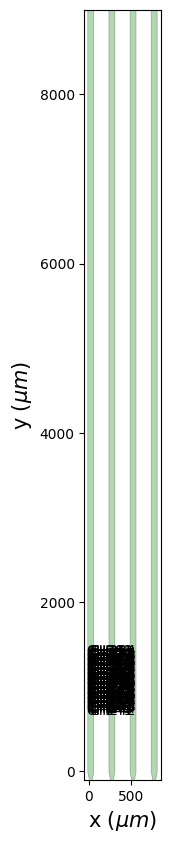

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
si.plot_probe_map(probe1, ax=ax, with_channel_ids=True)
ax.set_ylim(-100, 9000)

In [60]:
probemap

,x,y,contact_shapes,width,shank_ids,contact_ids
0,250.0,720.0,square,12.0,1,s1e96
1,282.0,720.0,square,12.0,1,s1e97
2,250.0,735.0,square,12.0,1,s1e98
3,282.0,735.0,square,12.0,1,s1e99
4,250.0,750.0,square,12.0,1,s1e100
...,...,...,...,...,...,...
91,282.0,1395.0,square,12.0,1,s1e187
92,250.0,1410.0,square,12.0,1,s1e188
93,282.0,1410.0,square,12.0,1,s1e189
94,250.0,1425.0,square,12.0,1,s1e190


In [79]:
probemap['channel'] = probe1.channel_ids
probemap['dbs'] = freq['delta_power']

(100.0, 450.0)

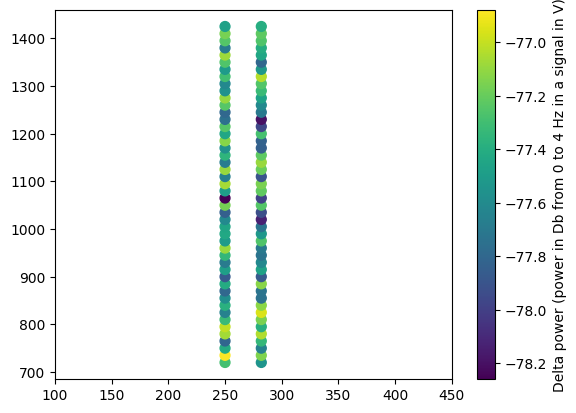

In [88]:
fig, ax = plt.subplots()

# Create a scatter plot
sc = ax.scatter(probemap['x'], probemap['y'], c=probemap['dbs'], cmap='viridis', s=50)

# Add color bar for the 'dfs' values (make sure to pass the scatter plot object `sc`)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Delta power (power in Db from 0 to 4 Hz in a signal in V)')

# Set x-axis limits
ax.set_xlim((100, 450))

In [87]:

probemap.to_csv('probemap.csv')